Hypothesis- I believe that there can be some quantiative correlation between the headlines regarding a company and its stock price.

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 6.4 MB 14.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install torch

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 8.3 MB/s 
     |████████████████████████████████| 3.3 MB 56.8 MB/s 
     |████████████████████████████████| 596 kB 59.9 MB/s 
     |████████████████████████████████| 895 kB 60.7 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pickle

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("us_equities_news_dataset.csv")

In [ ]:
df.shape #value must be (221513, 4). if not, wait for dataset to load into df.

(221513, 4)

In [ ]:
adf = df.loc[df.ticker == "AAPL"]

In [ ]:
adf

,ticker,title,category,release_date
49183,AAPL,JPMorgan cautious ahead of Apple earnings,news,2020-01-28
49184,AAPL,FAANG s Fall but Get Some Wall Street Love,news,2020-01-28
49185,AAPL,Wall Street tumbles as virus fuels economic worry,news,2020-01-28
49186,AAPL,Earnings Watch Apple and AMD to take earnings...,news,2020-01-28
49187,AAPL,Day Ahead Top 3 Things to Watch for Jan 28,news,2020-01-28
...,...,...,...,...
69409,AAPL,Waiting For Direction On The Markets,opinion,2012-07-16
69410,AAPL,Mid Year Update U S And Canadian Stock Marke...,opinion,2012-07-19
69411,AAPL,Summer Heat Scorches Europe And U S,opinion,2012-07-23
69412,AAPL,Apple Earnings Preview Quarterly Dip On Deck,opinion,2012-07-23


In [ ]:
adf.shape #value should be (20231, 4). if not, wait for dataset to load into df.

(20231, 4)

In [ ]:
adf = adf.sort_values("release_date", ascending=False)
adf

,ticker,title,category,release_date
49183,AAPL,JPMorgan cautious ahead of Apple earnings,news,2020-01-28
49738,AAPL,The Zacks Analyst Blog Highlights Apple Tesl...,opinion,2020-01-28
49970,AAPL,Stocks making the biggest moves midday 3M Be...,news,2020-01-28
49971,AAPL,Huawei snatched market share from Apple local...,news,2020-01-28
49972,AAPL,Wall Street rebounds as Apple surges ahead of ...,news,2020-01-28
...,...,...,...,...
69411,AAPL,Summer Heat Scorches Europe And U S,opinion,2012-07-23
69412,AAPL,Apple Earnings Preview Quarterly Dip On Deck,opinion,2012-07-23
69413,AAPL,Trade Apple After Earnings,opinion,2012-07-23
69410,AAPL,Mid Year Update U S And Canadian Stock Marke...,opinion,2012-07-19


In [ ]:
release_dates = np.array(adf.release_date) #array of all dates on which some news was published
release_dates

array(['2020-01-28', '2020-01-28', '2020-01-28', ..., '2012-07-23',
       '2012-07-19', '2012-07-16'], dtype=object)

In [ ]:
apple_stock = yf.download("AAPL", start="2012-07-16", end="2020-01-29")

[*********************100%***********************]  1 of 1 completed


In [ ]:
apple_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-16,21.611429,21.843571,21.607857,21.675358,18.583696,301260400
2012-07-17,21.813929,21.839287,21.541071,21.676430,18.584620,293624800
2012-07-18,21.663929,21.726429,21.555714,21.652143,18.563789,252700000
2012-07-19,21.831429,21.976786,21.642857,21.940001,18.810591,436861600
2012-07-20,21.893929,21.944286,21.560715,21.582144,18.503775,397471200
...,...,...,...,...,...,...
2020-01-22,79.644997,79.997498,79.327499,79.425003,78.262482,101832400
2020-01-23,79.480003,79.889999,78.912498,79.807503,78.639389,104472000
2020-01-24,80.062500,80.832497,79.379997,79.577499,78.412743,146537600


In [ ]:
apple_stock = apple_stock.drop(columns = ["Volume"])

In [ ]:
apple_stock = apple_stock.drop(columns = ["High", "Low"])

In [ ]:
apple_stock = apple_stock.drop(columns = ["Adj Close"])

In [ ]:
apple_stock

,Open,Close
Date,,
2012-07-16,21.611429,21.675358
2012-07-17,21.813929,21.676430
2012-07-18,21.663929,21.652143
2012-07-19,21.831429,21.940001
2012-07-20,21.893929,21.582144
...,...,...
2020-01-22,79.644997,79.425003
2020-01-23,79.480003,79.807503
2020-01-24,80.062500,79.577499


In [ ]:
apple_stock = apple_stock.reset_index()

In [ ]:
apple_stock

,Date,Open,Close
0,2012-07-16,21.611429,21.675358
1,2012-07-17,21.813929,21.676430
2,2012-07-18,21.663929,21.652143
3,2012-07-19,21.831429,21.940001
4,2012-07-20,21.893929,21.582144
...,...,...,...
1891,2020-01-22,79.644997,79.425003
1892,2020-01-23,79.480003,79.807503
1893,2020-01-24,80.062500,79.577499
1894,2020-01-27,77.514999,77.237503


In [ ]:
apple_stock["Date"]

0      2012-07-16
1      2012-07-17
2      2012-07-18
3      2012-07-19
4      2012-07-20
          ...    
1891   2020-01-22
1892   2020-01-23
1893   2020-01-24
1894   2020-01-27
1895   2020-01-28
Name: Date, Length: 1896, dtype: datetime64[ns]

In [ ]:
#Date is currently datetime64. Need to convert it into a numpy object like df["release_date"]

In [ ]:
pd.to_datetime(apple_stock["Date"])

0      2012-07-16
1      2012-07-17
2      2012-07-18
3      2012-07-19
4      2012-07-20
          ...    
1891   2020-01-22
1892   2020-01-23
1893   2020-01-24
1894   2020-01-27
1895   2020-01-28
Name: Date, Length: 1896, dtype: datetime64[ns]

In [ ]:
for i in apple_stock.Date:
    i.strftime("%Y-%m-%d")

In [ ]:
apple_stock["Date"]

0      2012-07-16
1      2012-07-17
2      2012-07-18
3      2012-07-19
4      2012-07-20
          ...    
1891   2020-01-22
1892   2020-01-23
1893   2020-01-24
1894   2020-01-27
1895   2020-01-28
Name: Date, Length: 1896, dtype: datetime64[ns]

In [ ]:
for i in apple_stock.Date:
    datetime.datetime.date(i)

In [ ]:
#Filtering dates from apple_stock df to match adf

In [ ]:
l = []
for i in apple_stock.Date:
    i = pd.to_datetime(str(i))
    l.append(i.strftime("%Y-%m-%d"))

In [ ]:
l

['2012-07-16',
 '2012-07-17',
 '2012-07-18',
 '2012-07-19',
 '2012-07-20',
 '2012-07-23',
 '2012-07-24',
 '2012-07-25',
 '2012-07-26',
 '2012-07-27',
 '2012-07-30',
 '2012-07-31',
 '2012-08-01',
 '2012-08-02',
 '2012-08-03',
 '2012-08-06',
 '2012-08-07',
 '2012-08-08',
 '2012-08-09',
 '2012-08-10',
 '2012-08-13',
 '2012-08-14',
 '2012-08-15',
 '2012-08-16',
 '2012-08-17',
 '2012-08-20',
 '2012-08-21',
 '2012-08-22',
 '2012-08-23',
 '2012-08-24',
 '2012-08-27',
 '2012-08-28',
 '2012-08-29',
 '2012-08-30',
 '2012-08-31',
 '2012-09-04',
 '2012-09-05',
 '2012-09-06',
 '2012-09-07',
 '2012-09-10',
 '2012-09-11',
 '2012-09-12',
 '2012-09-13',
 '2012-09-14',
 '2012-09-17',
 '2012-09-18',
 '2012-09-19',
 '2012-09-20',
 '2012-09-21',
 '2012-09-24',
 '2012-09-25',
 '2012-09-26',
 '2012-09-27',
 '2012-09-28',
 '2012-10-01',
 '2012-10-02',
 '2012-10-03',
 '2012-10-04',
 '2012-10-05',
 '2012-10-08',
 '2012-10-09',
 '2012-10-10',
 '2012-10-11',
 '2012-10-12',
 '2012-10-15',
 '2012-10-16',
 '2012-10-

In [ ]:
apple_stock.drop(columns = ["Date"])

,Open,Close
0,21.611429,21.675358
1,21.813929,21.676430
2,21.663929,21.652143
3,21.831429,21.940001
4,21.893929,21.582144
...,...,...
1891,79.644997,79.425003
1892,79.480003,79.807503
1893,80.062500,79.577499
1894,77.514999,77.237503


In [ ]:
apple_stock["Date"] = l

In [ ]:
apple_stock

,Date,Open,Close
0,2012-07-16,21.611429,21.675358
1,2012-07-17,21.813929,21.676430
2,2012-07-18,21.663929,21.652143
3,2012-07-19,21.831429,21.940001
4,2012-07-20,21.893929,21.582144
...,...,...,...
1891,2020-01-22,79.644997,79.425003
1892,2020-01-23,79.480003,79.807503
1893,2020-01-24,80.062500,79.577499
1894,2020-01-27,77.514999,77.237503


In [ ]:
apple_stock_dates = np.array(apple_stock["Date"])
apple_stock_dates

array(['2012-07-16', '2012-07-17', '2012-07-18', ..., '2020-01-24',
       '2020-01-27', '2020-01-28'], dtype=object)

In [ ]:
adf["release_date"]

49183    2020-01-28
49738    2020-01-28
49970    2020-01-28
49971    2020-01-28
49972    2020-01-28
            ...    
69411    2012-07-23
69412    2012-07-23
69413    2012-07-23
69410    2012-07-19
69409    2012-07-16
Name: release_date, Length: 20231, dtype: object

In [ ]:
adf["release_date"].value_counts()

2019-11-04    116
2017-09-11    114
2017-07-11    107
2017-07-13    100
2019-01-03     96
             ... 
2013-05-23      1
2013-06-05      1
2013-10-16      1
2013-01-26      1
2014-01-18      1
Name: release_date, Length: 2267, dtype: int64

In [ ]:
l = []
for i in range(len(apple_stock_dates)):
    if apple_stock_dates[i] not in release_dates:
        l.append(i)
len(l)

156

In [ ]:
apple_stock = apple_stock.drop(l)

In [ ]:
#Date filtering portion is complete

In [ ]:
#Since there might be various news for one single day, no use merging apple_stock and adf

In [ ]:
apple_stock

,Date,Open,Close
0,2012-07-16,21.611429,21.675358
3,2012-07-19,21.831429,21.940001
5,2012-07-23,21.228571,21.565357
6,2012-07-24,21.692142,21.461430
9,2012-07-27,20.536072,20.898571
...,...,...,...
1891,2020-01-22,79.644997,79.425003
1892,2020-01-23,79.480003,79.807503
1893,2020-01-24,80.062500,79.577499
1894,2020-01-27,77.514999,77.237503


In [ ]:
adf = adf.iloc[::-1]

In [ ]:
adf

,ticker,title,category,release_date
69409,AAPL,Waiting For Direction On The Markets,opinion,2012-07-16
69410,AAPL,Mid Year Update U S And Canadian Stock Marke...,opinion,2012-07-19
69413,AAPL,Trade Apple After Earnings,opinion,2012-07-23
69412,AAPL,Apple Earnings Preview Quarterly Dip On Deck,opinion,2012-07-23
69411,AAPL,Summer Heat Scorches Europe And U S,opinion,2012-07-23
...,...,...,...,...
49972,AAPL,Wall Street rebounds as Apple surges ahead of ...,news,2020-01-28
49971,AAPL,Huawei snatched market share from Apple local...,news,2020-01-28
49970,AAPL,Stocks making the biggest moves midday 3M Be...,news,2020-01-28
49738,AAPL,The Zacks Analyst Blog Highlights Apple Tesl...,opinion,2020-01-28


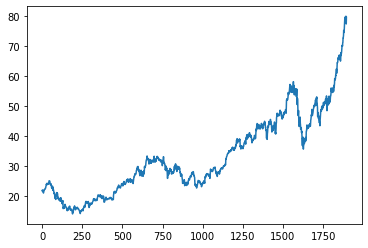

In [ ]:
plt.plot(apple_stock.Close)

In [ ]:
#release_dates is an array with all news release dates of apple
#apple_stock_dates is the dates for which we have apple stock data in the range based on adf
#release_date is the column of adf from which we derived release_dates

In [ ]:
#BERT implementation starts here-

In [ ]:
"""
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
"""

"\ntokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')\nmodel = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')\n"

In [ ]:
"""
def sentiment_score(news):
    tokens = tokenizer.encode(news, return_tensors = "pt")
    result = model(tokens)
    return int(torch.argmax(result.logits))+1
"""

'\ndef sentiment_score(news):\n    tokens = tokenizer.encode(news, return_tensors = "pt")\n    result = model(tokens)\n    return int(torch.argmax(result.logits))+1\n'

In [ ]:
"""
scores = []
for i in adf.title:
    scores.append(sentiment_score(i))
"""

'\nscores = []\nfor i in adf.title:\n    scores.append(sentiment_score(i))\n'

In [ ]:
#pickle scores list to avoid wasting time BERT-ing adf.title everytime

In [ ]:
"""
open_file = open("BERT_sentiment_scores", "wb")
pickle.dump(scores, open_file)
open_file.close()
"""

'\nopen_file = open("BERT_sentiment_scores", "wb")\npickle.dump(scores, open_file)\nopen_file.close()\n'

In [ ]:
f = open("BERT_sentiment_scores", "rb")
scores = pickle.load(f)

In [ ]:
adf["BERT_sentiments"] = scores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
adf

,ticker,title,category,release_date,BERT_sentiments
69409,AAPL,Waiting For Direction On The Markets,opinion,2012-07-16,3
69410,AAPL,Mid Year Update U S And Canadian Stock Marke...,opinion,2012-07-19,3
69413,AAPL,Trade Apple After Earnings,opinion,2012-07-23,1
69412,AAPL,Apple Earnings Preview Quarterly Dip On Deck,opinion,2012-07-23,4
69411,AAPL,Summer Heat Scorches Europe And U S,opinion,2012-07-23,5
...,...,...,...,...,...
49972,AAPL,Wall Street rebounds as Apple surges ahead of ...,news,2020-01-28,5
49971,AAPL,Huawei snatched market share from Apple local...,news,2020-01-28,1
49970,AAPL,Stocks making the biggest moves midday 3M Be...,news,2020-01-28,5
49738,AAPL,The Zacks Analyst Blog Highlights Apple Tesl...,opinion,2020-01-28,4


In [ ]:
apple_stock["percent_changes"] = apple_stock["Close"].pct_change()

In [ ]:
apple_stock

,Date,Open,Close,percent_changes
0,2012-07-16,21.611429,21.675358,NaN
3,2012-07-19,21.831429,21.940001,0.012209
5,2012-07-23,21.228571,21.565357,-0.017076
6,2012-07-24,21.692142,21.461430,-0.004819
9,2012-07-27,20.536072,20.898571,-0.026227
...,...,...,...,...
1891,2020-01-22,79.644997,79.425003,0.003570
1892,2020-01-23,79.480003,79.807503,0.004816
1893,2020-01-24,80.062500,79.577499,-0.002882
1894,2020-01-27,77.514999,77.237503,-0.029405


In [ ]:
ones = adf[(adf.BERT_sentiments == 1)]

In [ ]:
twos = adf[(adf.BERT_sentiments == 2)]
threes = adf[(adf.BERT_sentiments == 3)]
fours = adf[(adf.BERT_sentiments == 4)]
fives = adf[(adf.BERT_sentiments == 5)]

In [ ]:
ones

,ticker,title,category,release_date,BERT_sentiments
69413,AAPL,Trade Apple After Earnings,opinion,2012-07-23,1
69403,AAPL,Will AAPL Fall From The Tree,opinion,2012-07-27,1
69405,AAPL,Sifting Through The Earnings Rubble,opinion,2012-07-29,1
69406,AAPL,Bulls Snatch Victory From Jaws of Defeat,opinion,2012-07-30,1
69393,AAPL,Portfolio Foundations And Pitfalls,opinion,2012-08-02,1
...,...,...,...,...,...
49732,AAPL,Did Apple Sell 70 Million iPhones,news,2020-01-28,1
49733,AAPL,Apple suppliers caution coronavirus could impa...,news,2020-01-28,1
49739,AAPL,Stocks Wall Street Seen Higher Apple Tops E...,news,2020-01-28,1
49743,AAPL,Selling abates after virus causes worst day si...,news,2020-01-28,1


In [ ]:
ones_test = adf[(adf.BERT_sentiments == 1)]

In [ ]:
ones_test

,ticker,title,category,release_date,BERT_sentiments
69413,AAPL,Trade Apple After Earnings,opinion,2012-07-23,1
69403,AAPL,Will AAPL Fall From The Tree,opinion,2012-07-27,1
69405,AAPL,Sifting Through The Earnings Rubble,opinion,2012-07-29,1
69406,AAPL,Bulls Snatch Victory From Jaws of Defeat,opinion,2012-07-30,1
69393,AAPL,Portfolio Foundations And Pitfalls,opinion,2012-08-02,1
...,...,...,...,...,...
49732,AAPL,Did Apple Sell 70 Million iPhones,news,2020-01-28,1
49733,AAPL,Apple suppliers caution coronavirus could impa...,news,2020-01-28,1
49739,AAPL,Stocks Wall Street Seen Higher Apple Tops E...,news,2020-01-28,1
49743,AAPL,Selling abates after virus causes worst day si...,news,2020-01-28,1


In [ ]:
#adding close price and percentage change date wise for separate dfs for seperate BERT sentiment scores
#score of 1 in df titled "ones," etc.

In [ ]:
a = []
for i in ones_test.release_date:
    condition = apple_stock.Date == i
    a.append(apple_stock.index[condition].tolist())

In [ ]:
b = []
for i in a:
    try:
        b.append(i[0])
    except:
        b.append(0)

In [ ]:
c = []
for i in b:
    lol = (apple_stock.Close[(apple_stock.index == i)].values)
    c.append(lol[0])

In [ ]:
ones_test["close"] = c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ones_test

,ticker,title,category,release_date,BERT_sentiments,close
69413,AAPL,Trade Apple After Earnings,opinion,2012-07-23,1,21.565357
69403,AAPL,Will AAPL Fall From The Tree,opinion,2012-07-27,1,20.898571
69405,AAPL,Sifting Through The Earnings Rubble,opinion,2012-07-29,1,21.675358
69406,AAPL,Bulls Snatch Victory From Jaws of Defeat,opinion,2012-07-30,1,21.251072
69393,AAPL,Portfolio Foundations And Pitfalls,opinion,2012-08-02,1,21.706785
...,...,...,...,...,...,...
49732,AAPL,Did Apple Sell 70 Million iPhones,news,2020-01-28,1,79.422501
49733,AAPL,Apple suppliers caution coronavirus could impa...,news,2020-01-28,1,79.422501
49739,AAPL,Stocks Wall Street Seen Higher Apple Tops E...,news,2020-01-28,1,79.422501
49743,AAPL,Selling abates after virus causes worst day si...,news,2020-01-28,1,79.422501


In [ ]:
c = []
for i in b:
    lol = (apple_stock.percent_changes[(apple_stock.index == i)].values)
    c.append(lol[0])

In [ ]:
ones_test["percent_changes"] = c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ones = ones_test #ones_test worked so just copying output to ones

In [ ]:
#doing the same for 2s
a = []
for i in twos.release_date:
    condition = apple_stock.Date == i
    a.append(apple_stock.index[condition].tolist())

b = []
for i in a:
    try:
        b.append(i[0])
    except:
        b.append(0)

c = []
for i in b:
    lol = (apple_stock.percent_changes[(apple_stock.index == i)].values)
    c.append(lol[0])

twos["percent_changes"] = c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
c = []
for i in b:
    lol = (apple_stock.Close[(apple_stock.index == i)].values)
    c.append(lol[0])

twos["close"] = c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
twos = twos[["ticker", "title", "category", "release_date", "BERT_sentiments", "close", "percent_changes"]]

In [ ]:
#doing the same for 3s
a = []
for i in threes.release_date:
    condition = apple_stock.Date == i
    a.append(apple_stock.index[condition].tolist())

b = []
for i in a:
    try:
        b.append(i[0])
    except:
        b.append(0)

c = []
for i in b:
    lol = (apple_stock.Close[(apple_stock.index == i)].values)
    c.append(lol[0])

threes["close"] = c

c = []
for i in b:
    lol = (apple_stock.percent_changes[(apple_stock.index == i)].values)
    c.append(lol[0])

threes["percent_changes"] = c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#doing the same for 4s
a = []
for i in fours.release_date:
    condition = apple_stock.Date == i
    a.append(apple_stock.index[condition].tolist())

b = []
for i in a:
    try:
        b.append(i[0])
    except:
        b.append(0)

c = []
for i in b:
    lol = (apple_stock.Close[(apple_stock.index == i)].values)
    c.append(lol[0])

fours["close"] = c

c = []
for i in b:
    lol = (apple_stock.percent_changes[(apple_stock.index == i)].values)
    c.append(lol[0])

fours["percent_changes"] = c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#doing the same for 5s
a = []
for i in fives.release_date:
    condition = apple_stock.Date == i
    a.append(apple_stock.index[condition].tolist())

b = []
for i in a:
    try:
        b.append(i[0])
    except:
        b.append(0)

c = []
for i in b:
    lol = (apple_stock.Close[(apple_stock.index == i)].values)
    c.append(lol[0])

fives["close"] = c

c = []
for i in b:
    lol = (apple_stock.percent_changes[(apple_stock.index == i)].values)
    c.append(lol[0])

fives["percent_changes"] = c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#checking average percentage changes per BERT sentiment
avg_1 = ones.percent_changes.mean()
avg_2 = twos.percent_changes.mean()
avg_3 = threes.percent_changes.mean()
avg_4 = fours.percent_changes.mean()
avg_5 = fives.percent_changes.mean()

In [ ]:
print(avg_1, avg_2, avg_3, avg_4, avg_5)

0.00016577057669351248 -0.0012562488087776477 0.0010017882299200298 0.0008191639265484525 0.0019437806108382183


In [ ]:
print("Average percentage change after a negative news-", round(avg_2, 6))
print("Average percentage change after a neutral news-", round(avg_3, 6))
print("Average percentage change after a positive news-", round(avg_5, 6))

Average percentage change after a negative news- -0.001256
Average percentage change after a neutral news- 0.001002
Average percentage change after a positive news- 0.001944


In [ ]:
#average percentage change check complete

In [ ]:
#new method to figure out average change that evades date repetitions.

In [ ]:
ones.dropna(inplace=True)
ones

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ticker,title,category,release_date,BERT_sentiments,close,percent_changes
69413,AAPL,Trade Apple After Earnings,opinion,2012-07-23,1,21.565357,-0.017076
69403,AAPL,Will AAPL Fall From The Tree,opinion,2012-07-27,1,20.898571,-0.026227
69406,AAPL,Bulls Snatch Victory From Jaws of Defeat,opinion,2012-07-30,1,21.251072,0.016867
69393,AAPL,Portfolio Foundations And Pitfalls,opinion,2012-08-02,1,21.706785,-0.004863
69396,AAPL,Chart Review Apple Breaks Out,opinion,2012-08-07,1,22.175358,0.021586
...,...,...,...,...,...,...,...
49732,AAPL,Did Apple Sell 70 Million iPhones,news,2020-01-28,1,79.422501,0.028289
49733,AAPL,Apple suppliers caution coronavirus could impa...,news,2020-01-28,1,79.422501,0.028289
49739,AAPL,Stocks Wall Street Seen Higher Apple Tops E...,news,2020-01-28,1,79.422501,0.028289
49743,AAPL,Selling abates after virus causes worst day si...,news,2020-01-28,1,79.422501,0.028289


In [ ]:
twos.dropna(inplace=True)
threes.dropna(inplace=True)
fours.dropna(inplace=True)
fives.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
avg_1 = ones.percent_changes.unique().mean()
avg_2 = twos.percent_changes.unique().mean()
avg_3 = threes.percent_changes.unique().mean()
avg_4 = fours.percent_changes.unique().mean()
avg_5 = fives.percent_changes.unique().mean()

In [ ]:
print(avg_1, avg_2, avg_3, avg_4, avg_5)
#previously calculated values: 0.00016577057669351248 -0.0012562488087776477 0.0010017882299200298 0.0008191639265484525 0.0019437806108382183

0.0009599213596706717 -0.00044613549371105344 0.0013888212567675418 0.00044201326856632147 0.0009729778644630664


In [ ]:
print("Average percentage change after a negative news-", round(avg_2, 6))
print("Average percentage change after a neutral news-", round(avg_3, 6))
print("Average percentage change after a positive news-", round(avg_5, 6))
#previously calculated values: -0.001256, 0.001002, 0.00194

Average percentage change after a negative news- -0.000446
Average percentage change after a neutral news- 0.001389
Average percentage change after a positive news- 0.000973


In [ ]:
#new method to evade repeated values completed.

In [ ]:
#now that we have values of percentage change in close price for positive, neutral and negative news,
#starting from first day's close price, we should loop through the dfs and keep increasing or decreasing
#the value based on the type of news published and see how far we are from the final close price at the end.

In [ ]:
#the problem to solve is that in some cases we have several published news articles with varying sentiments.
#solution is to find those cases, take the sentiments and average them to get a sentiment value for that date.

In [ ]:
plot_ref = pd.DataFrame()

In [ ]:
plot_ref["release_date"] = adf["release_date"]
plot_ref["BERT_sentiments"] = adf["BERT_sentiments"]

In [ ]:
plot_ref

,release_date,BERT_sentiments
69409,2012-07-16,3
69410,2012-07-19,3
69413,2012-07-23,1
69412,2012-07-23,4
69411,2012-07-23,5
...,...,...
49972,2020-01-28,5
49971,2020-01-28,1
49970,2020-01-28,5
49738,2020-01-28,4


In [ ]:
len(plot_ref.release_date.unique())

2267

In [ ]:
release_date_arr = list(plot_ref.release_date)
BERT_sentiments_arr = list(plot_ref.BERT_sentiments)

In [ ]:
def m(arr, len_arr):
    for i in range(len_arr-1):
        if release_date_arr[i] == release_date_arr[i+1]:
            BERT_sentiments_arr[i] = (BERT_sentiments_arr[i]+BERT_sentiments_arr[i+1])/2
            BERT_sentiments_arr.pop(i+1)
            release_date_arr.pop(i+1)
            break

for i in range(len(release_date_arr)):
    m(release_date_arr, len(release_date_arr))

In [ ]:
len(BERT_sentiments_arr), len(release_date_arr)

(2267, 2267)

In [ ]:
final_plot_ref = pd.DataFrame()
final_plot_ref["release_date"] = release_date_arr
final_plot_ref["BERT_sentiments"] = BERT_sentiments_arr

In [ ]:
final_plot_ref

,release_date,BERT_sentiments
0,2012-07-16,3.000000
1,2012-07-19,3.000000
2,2012-07-23,3.750000
3,2012-07-24,5.000000
4,2012-07-27,1.000000
...,...,...
2262,2020-01-24,2.942749
2263,2020-01-25,5.000000
2264,2020-01-26,3.402344
2265,2020-01-27,3.531250


(array([226., 135., 186., 199., 140., 297., 235., 274., 207., 368.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

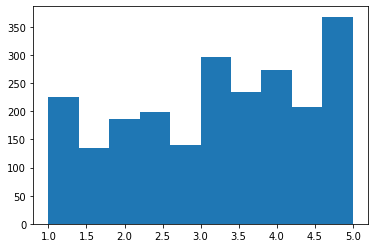

In [ ]:
plt.hist(final_plot_ref.BERT_sentiments)

In [ ]:
#multiple news published problem solved.

In [ ]:
#to test accuracy-

In [ ]:
#first open price- 21.565357
#final close price- 79.422501
cp = 21.565357
avg_neg = (avg_1+avg_2)/2
avg_neu = avg_3
avg_pos = (avg_4+avg_5)/2
for i in final_plot_ref.BERT_sentiments:
    if i>=1 and i<3:
        cp+=(cp*avg_neg)
    elif i == 3:
        cp+=(cp*avg_neu)
    else:
        cp+=(cp*avg_pos)

In [ ]:
print("Final Closing Price based on the model=", round(cp,6))
print("Actual Final Closing Price=", 79.422501)
print("Delta=", round(cp-79.422501, 6))

Final Closing Price based on the model= 80.45299
Actual Final Closing Price= 79.422501
Delta= 1.030489


In [ ]:
pct_acc = 1-((cp-79.422501)/79.422501)
print("Percentage Accuracy=", round(pct_acc*100, 3))

Percentage Accuracy= 98.703


In [ ]:
#accuracy test concluded

In [ ]:
print(avg_neg, avg_neu, avg_pos)

0.0002568929329798091 0.0013888212567675418 0.0007074955665146939


In [ ]:
exporting = adf[["title", "release_date", "BERT_sentiments"]]

In [ ]:
#exporting.to_csv("printing.csv")

In [ ]:
ref_dates = final_plot_ref.release_date.tolist()

In [ ]:
l = []
for i in ref_dates:
    l.append(apple_stock.Close.loc[(apple_stock.Date == i)].tolist())
len(l)

2267

In [ ]:
final_plot_ref["close"] = l

In [ ]:
cp = 21.565357
avg_neg = (avg_1+avg_2)/2
avg_neu = avg_3
avg_pos = (avg_4+avg_5)/2
predicted_values = []
for i in final_plot_ref.BERT_sentiments:
    if i>=1 and i<3:
        cp+=(cp*avg_neg)
    elif i == 3:
        cp+=(cp*avg_neu)
    else:
        cp+=(cp*avg_pos)
    predicted_values.append(cp)

In [ ]:
final_plot_ref["predicted close"] = predicted_values

In [ ]:
final_plot_ref

,release_date,BERT_sentiments,close,predicted close
0,2012-07-16,3.000000,[21.675357818603516],21.595307
1,2012-07-19,3.000000,[21.940000534057617],21.625299
2,2012-07-23,3.750000,[21.565357208251953],21.640599
3,2012-07-24,5.000000,[21.461429595947266],21.655910
4,2012-07-27,1.000000,[20.898571014404297],21.661473
...,...,...,...,...
2262,2020-01-24,2.942749,[79.57749938964844],80.225711
2263,2020-01-25,5.000000,[],80.282471
2264,2020-01-26,3.402344,[],80.339270
2265,2020-01-27,3.531250,[77.23750305175781],80.396110


In [ ]:
a1 = list(final_plot_ref.close)
a2 = list(final_plot_ref["predicted close"])

In [ ]:
num = []
for i in range(len(a1)):
    if a1[i] == []:
            num.append(i)

In [ ]:
for i in num[::-1]:
    a1.pop(i)
    a1[i] = 0
    a2.pop(i)
    a2[i] = 0

In [ ]:
for i in range(len(a1)):
    try:
        j = a1[i][0]
        a1[i] = j
    except:
        a1[i] = 0

In [ ]:
rmse = mean_squared_error(a1, a2, squared=False)

In [ ]:
rmse

11.023163697603097

In [ ]:
a1 = list(a1)
a2 = list(a2)
for i in a1:
    if i == 0:
        a1.remove(i)
for j in a2:
    if j == 0:
        a2.remove(j)

Text(0, 0.5, 'Closing Price')

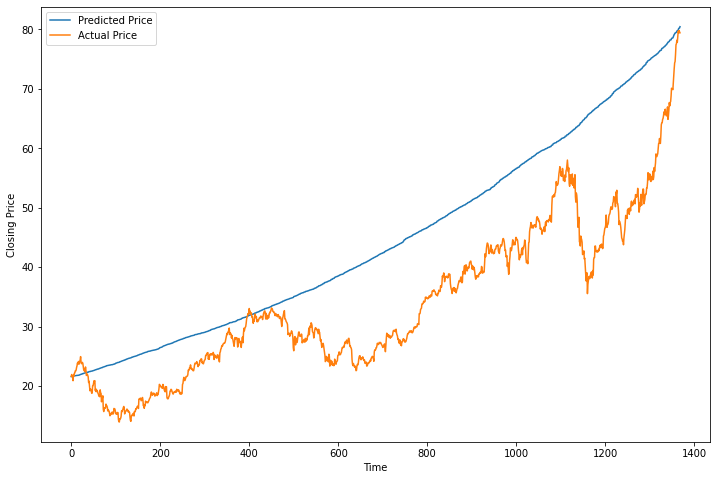

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(a2)
plt.plot(a1)
plt.legend(["Predicted Price", "Actual Price"])
plt.xlabel("Time")
plt.ylabel("Closing Price")